In [1]:
import pandas as pd

In [2]:
athletes = pd.read_csv("bgadoci-crossfit-data/athletes.csv")
athletes

/Users/spencerkimball/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423001,574489.0,Odo Renata,Latin America,Team Guarujá Inox,CrossFit Guaruja,Female,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:05
423002,585696.0,Lozzie Trevor,Australia,FBP CrossFit Games Team,FBP CrossFit,Female,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:06
423003,608828.0,Marisol Smith,North West,CrossFit Oak Harbor,CrossFit Oak Harbor,Female,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:07
423004,628881.0,Pedrini Morgane,Europe,NaN,CrossFit 67,Female,20.0,64.0,61.0,NaN,...,80.0,143.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,NaN,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I strictly s...,6-12 months|,2015-03-25 09:55:07


## Braden's Preprocessing Section - Join Data and Filter Columns

In [3]:
# First need to read in the leader dataset
leader = pd.read_csv("bgadoci-crossfit-data/leaderboard.15.csv")

In [4]:
# Join on athlete ID
df = pd.merge(athletes, leader, on='athlete_id', how='inner')
# Make sure it looks okay
df.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,schedule,howlong,retrieved_datetime_x,year,division,stage,rank,score,retrieved_datetime_y,scaled
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,5.0,44119.0,771.0,2015-03-31 21:47:26,0
1,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.0,43966.0,130.0,2015-03-31 23:02:54,0
2,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.1,32461.0,225.0,2015-03-31 23:30:57,0
3,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,2.0,58455.0,78.0,2015-03-31 23:53:31,0
4,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,3.0,30179.0,314.0,2015-04-01 00:27:51,0


In [5]:
# Drop all of our na's and check for unique values in each column
testing = df.dropna()
testing.nunique()

athlete_id               679
name                     679
region                    17
team                     574
affiliate                567
gender                     2
age                       38
height                    23
weight                   120
fran                     313
helen                    335
grace                    270
filthy50                 503
fgonebad                 247
run400                    95
run5k                    381
candj                    120
snatch                   113
deadlift                 141
backsq                   133
pullups                   80
eat                       23
train                     45
background                18
experience                43
schedule                  51
howlong                   12
retrieved_datetime_x     675
year                       1
division                   2
stage                      6
rank                    2427
score                    775
retrieved_datetime_y    2211
scaled        

NOTE: We noticed in our EDA that several variables had absurd responses: 800,000 pullups, 5,000 lb. back squat etc... So we used our best judgement to determine where the cutoff for a reasonable score on each continuous variable might be.

In [6]:
# How many rows we have before
print(len(testing))

3802


In [7]:
# Filtered Dataframes
testing = testing[testing['fran'] < 1250]
testing = testing[testing['helen'] < 2000]
testing = testing[testing['grace'] < 1000]
testing = testing[testing['filthy50'] < 4000]
testing = testing[testing['fgonebad'] < 625]
testing = testing[testing['run400'] < 200]
testing = testing[testing['run5k'] < 3000]
testing = testing[testing['candj'] < 500]
testing = testing[testing['snatch'] < 350]
testing = testing[testing['deadlift'] < 750]
testing = testing[testing['backsq'] < 750]
testing = testing[testing['pullups'] < 74]


In [8]:
# Number of rows now
print(len(testing))

3625


3802
3625

<AxesSubplot:>

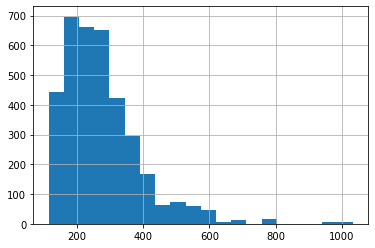

In [9]:
# Histogram to illustrate the distribution looks okay 
testing.fran.hist(bins = 20)



In [10]:
#athletes.eat.unique()

Possible values for eat:
* I eat quality foods but don't measure the amount
* I eat strict Paleo
* I eat 1-3 full cheat meals per week
* I eat whatever is convenient
* I weigh and measure my food

In [11]:
#athletes.train.unique()

Possible values for train:
* I workout mostly at a CrossFit Affiliate
* I have a coach who determines my programming
* I record my workouts
* I incorporate CrossFit.com workouts
* I write my own programming
* I workout mostly at home, work, or a traditional gym



In [12]:
import numpy as np
athletes = testing

In [13]:
# calculate dummies for train column
athletes = athletes.dropna()
a = athletes["train"].str.split('|').explode().to_frame()
cols = a["train"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["train"])[cols]], axis=1)

athletes.drop('train', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
#athletes

In [14]:
# calculate dummies for background column
a = athletes["background"].str.split('|').explode().to_frame()
cols = a["background"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["background"])[cols]], axis=1)

athletes.drop('background', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
#athletes


In [15]:
# calculate dummies for experience column
a = athletes["experience"].str.split('|').explode().to_frame()
cols = a["experience"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["experience"])[cols]], axis=1)

athletes.drop('experience', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
#athletes

In [16]:
# calculate dummies for schedule column
a = athletes["schedule"].str.split('|').explode().to_frame()
cols = a["schedule"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["schedule"])[cols]], axis=1)

athletes.drop('schedule', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
#athletes

In [17]:
#athletes.background.unique()

Possible values for background:
* I played youth or high school level sports
* I regularly play recreational sports
* I played college sports
* I have no athletic background besides CrossFit
* I played professional sports

In [18]:
#athletes.experience.unique()

Possible values for experience: 
* I began CrossFit with a coach (e.g. at an affiliate)
* I have attended one or more specialty courses
* I have had a life changing experience due to CrossFit
* I began CrossFit by trying it alone (without a coach)
* I have completed the CrossFit Level 1 certificate course
* I train other people


In [19]:
#athletes.schedule.unique()

Possible values for schedule:
* I do multiple workouts in a day 2x a week
* I usually only do 1 workout a day
* I strictly schedule my rest days
* I typically rest 4 or more days per month
* I do multiple workouts in a day 3+ times a week
* I typically rest fewer than 4 days per month
* I do multiple workouts in a day 1x a week

In [20]:
#athletes.howlong.unique()

In [21]:
#athletes.age.describe()
#athletes.height.describe()
#athletes.weight.describe()
#athletes.fran.describe()
#athletes.helen.describe()
#athletes.grace.describe()
#athletes.filthy50.describe()
#athletes.fgonebad.describe()
#athletes.run400.describe()
#athletes.run5k.describe()
#athletes.candj.describe()
#athletes.snatch.describe()
#athletes.deadlift.describe()
#athletes.backsq.describe()
#athletes.pullups.describe()

Decision tree model

bagging

knn

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error 



In [23]:
# calculate dummies for eat column
a = athletes["eat"].str.split('|').explode().to_frame()
cols = a["eat"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["eat"])[cols]], axis=1)

athletes.drop('eat', axis=1, inplace=True)  

In [24]:
def PipeKNN(neighbors=1):
    return make_pipeline(StandardScaler(),
                         KNeighborsRegressor(n_neighbors=neighbors))

In [25]:
athletes = athletes.astype({'region': 'category', 
                            'team': 'category', 
                            'gender': 'category',  
                            'affiliate': 'category'})

In [26]:
categorical_cols = ['region', 'team', 'gender', 'affiliate','howlong'] 
df_with_dummies = pd.get_dummies(athletes, columns = categorical_cols)

In [27]:
#df_with_dummies.head(10)

In [28]:
list(df_with_dummies.columns)

['athlete_id',
 'name',
 'age',
 'height',
 'weight',
 'fran',
 'helen',
 'grace',
 'filthy50',
 'fgonebad',
 'run400',
 'run5k',
 'candj',
 'snatch',
 'deadlift',
 'backsq',
 'pullups',
 'retrieved_datetime_x',
 'year',
 'division',
 'stage',
 'rank',
 'score',
 'retrieved_datetime_y',
 'scaled',
 'I workout mostly at a CrossFit Affiliate',
 'I workout mostly at home, work, or a traditional gym',
 'I have a coach who determines my programming',
 'I incorporate CrossFit.com workouts',
 'I write my own programming',
 'I record my workouts',
 'Decline to answer',
 'I played youth or high school level sports',
 'I regularly play recreational sports',
 'I played college sports',
 'I played professional sports',
 'I have no athletic background besides CrossFit',
 'Decline to answer',
 'I began CrossFit by trying it alone (without a coach)',
 'I have completed the CrossFit Level 1 certificate course',
 'I train other people',
 'I have attended one or more specialty courses',
 'I have had a l

In [29]:
is_male =  df_with_dummies['gender_Male']==1
df_with_dummies_male = df_with_dummies[is_male]
test_column = 'run400'

In [30]:
y = df_with_dummies_male["rank"].to_numpy()

In [31]:
X = df_with_dummies_male.drop(columns = ['athlete_id','name','year','rank','retrieved_datetime_y','retrieved_datetime_x','division'])
# drop division because everyone is in division 1 for the males



In [32]:
X_1 = X[[test_column]]
#X_1

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()


,index,run400
0,105843,54.0
1,202077,73.0
2,232572,81.0
3,342273,58.0
4,580717,66.0
...,...,...
1717,375027,85.0
1718,91481,65.0
1719,683044,58.0
1720,375028,85.0


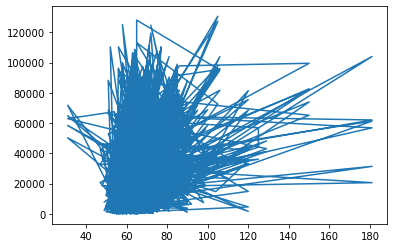

In [34]:
import matplotlib.pyplot as plt
plt.plot(X_train, y_train)

In [35]:
print(type(y_train))
print(y_train)

<class 'numpy.ndarray'>
[29540. 73958. 55556. ... 53362. 20795. 21326.]


In [36]:
print(type(y))
print(y)

<class 'numpy.ndarray'>
[  6042.   9661.  22556. ... 130589. 127191.  97560.]


In [37]:
#print(X_train)
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [38]:
# candj :)
# age, weight doesn't really give any good interpretations
# filthy50, is all over the place

{'kneighborsregressor__n_neighbors': 33}
Accuracy Score: 0.1618204938089558


<AxesSubplot:xlabel='run400'>

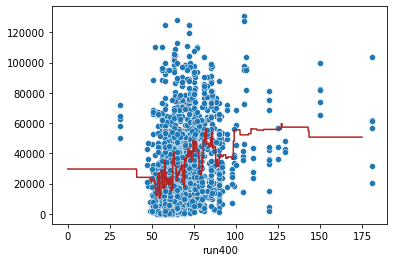

In [39]:
test_column = 'run400'
X_1 = X[[test_column]]

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

X_plot = pd.DataFrame(np.linspace(0,175,5000), columns=[test_column])

pipe = PipeKNN(33)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))
# Said that the best number of neighbors was 39 for run400

#run400 looks pretty good
X_plot_1 = X_plot.squeeze()
#print(X_plot)
#print(X_plot[test_column])
#print(X_plot.ndim)
#print(X_plot[test_column].ndim)
my_series = df.squeeze()
#print(type(X_plot.squeeze()))
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

{'kneighborsregressor__n_neighbors': 23}
Accuracy Score: 0.22356565535726247


[(150.0, 600.0)]

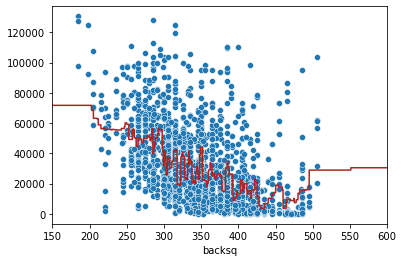

In [40]:
test_column = 'backsq'
X_1 = X[[test_column]]
#print(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()


X_plot = pd.DataFrame(np.linspace(150,600,5000), columns=[test_column])

pipe = PipeKNN(23)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

X_plot_1 = X_plot.squeeze()

my_series = df.squeeze()
g = sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')
g.set(xlim=(150, 600))

{'kneighborsregressor__n_neighbors': 7}
Accuracy Score: 0.34194891623694845


<AxesSubplot:xlabel='helen'>

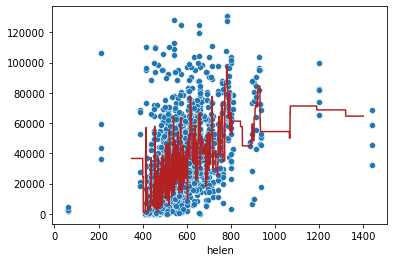

In [41]:
test_column = 'helen'
X_1 = X[[test_column]]
#print(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()


X_plot = pd.DataFrame(np.linspace(350,1400,5000), columns=[test_column])

pipe = PipeKNN(7)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

X_plot_1 = X_plot.squeeze()

my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

{'kneighborsregressor__n_neighbors': 6}
Accuracy Score: 0.45402719724288665


<AxesSubplot:xlabel='fran'>

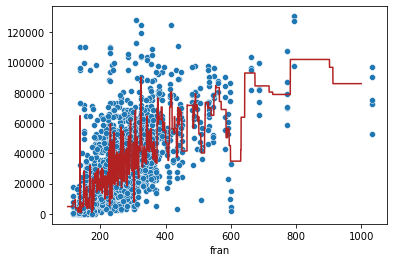

In [53]:
test_column = 'fran'
X_1 = X[[test_column]]
#print(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

X_plot = pd.DataFrame(np.linspace(100,1000,5000), columns=[test_column])

pipe = PipeKNN(6)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

X_plot_1 = X_plot.squeeze()

my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

In [54]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 25291.177954097326
RMSE value for k=  2 is: 21157.28573417081
RMSE value for k=  3 is: 19206.498231970516
RMSE value for k=  4 is: 18726.150882242535
RMSE value for k=  5 is: 18616.41928248771
RMSE value for k=  6 is: 18399.825278894037
RMSE value for k=  7 is: 18510.823929253078
RMSE value for k=  8 is: 18483.383900063785
RMSE value for k=  9 is: 18309.065782871818
RMSE value for k=  10 is: 18245.959263706627
RMSE value for k=  11 is: 18107.149049336756
RMSE value for k=  12 is: 18101.972669737024
RMSE value for k=  13 is: 18138.364339722662
RMSE value for k=  14 is: 18279.16745885142
RMSE value for k=  15 is: 18334.273852797636
RMSE value for k=  16 is: 18318.942176979363
RMSE value for k=  17 is: 18339.989626030016
RMSE value for k=  18 is: 18436.439637253032
RMSE value for k=  19 is: 18383.033910080918
RMSE value for k=  20 is: 18491.177486345092


<AxesSubplot:>

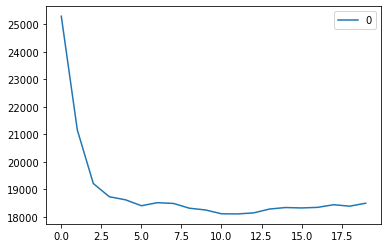

In [55]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#RMSE value for k=  5 is: 18616.41928248771
#RMSE value for k=  6 is: 18399.825278894037
#RMSE value for k=  7 is: 18510.823929253078

# The plot for the root mean squared error values
# has a corresponding elbow at 6 that does correspond 
# with what the cross validation grid search found as the 
# best parameter

{'kneighborsregressor__n_neighbors': 4}
Accuracy Score: 0.2139897266044809


[(750.0, 2500.0)]

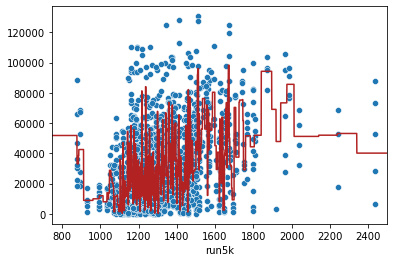

In [43]:
test_column = 'run5k'
X_1 = X[[test_column]]
#print(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

X_plot = pd.DataFrame(np.linspace(600,2500,5000), columns=[test_column])

pipe = PipeKNN(4)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

X_plot_1 = X_plot.squeeze()

my_series = df.squeeze()
g = sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')
g.set(xlim=(750, 2500))

{'kneighborsregressor__n_neighbors': 37}
-395610093.58077174
Accuracy Score: 0.38727194766142503


<AxesSubplot:xlabel='candj'>

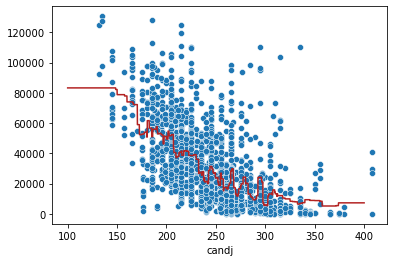

In [44]:
test_column = 'candj'
X_1 = X[[test_column]]

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

X_plot = pd.DataFrame(np.linspace(100,400,5000), columns=[test_column])

pipe = PipeKNN(37)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
print('Accuracy Score:', pipe.score(X_test, y_test))

X_plot_1 = X_plot.squeeze()

my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

{'kneighborsregressor__n_neighbors': 21}
Accuracy Score: 0.001711958744690767


[(125.0, 300.0)]

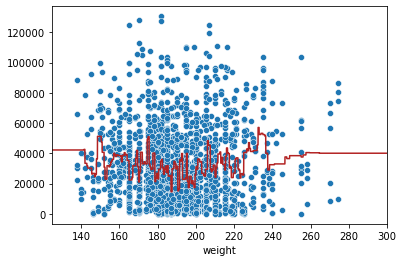

In [45]:
test_column = 'weight'
X_1 = X[[test_column]]

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

X_plot = pd.DataFrame(np.linspace(100,400,5000), columns=[test_column])

pipe = PipeKNN(21)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

X_plot_1 = X_plot.squeeze()

my_series = df.squeeze()
g = sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')
g.set(xlim=(125, 300))

{'kneighborsregressor__n_neighbors': 33}
-583415593.8167293
Accuracy Score: 0.1349243370830755


<AxesSubplot:xlabel='age'>

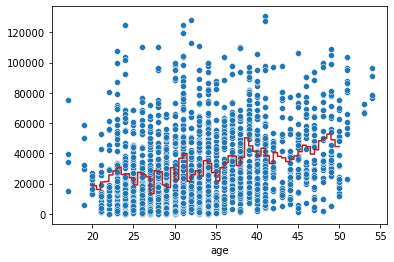

In [46]:
test_column = 'age'
X_1 = X[[test_column]]

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

X_plot = pd.DataFrame(np.linspace(20,50,5000), columns=[test_column])

pipe = PipeKNN(33)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
print('Accuracy Score:', pipe.score(X_test, y_test))

X_plot_1 = X_plot.squeeze()

my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

{'kneighborsregressor__n_neighbors': 33}
Accuracy Score: 0.1241518676123039


<AxesSubplot:xlabel='age'>

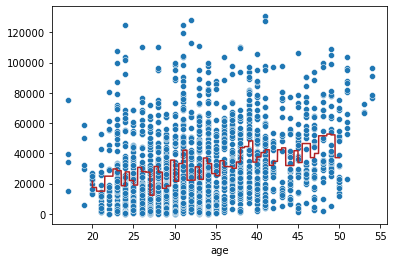

In [47]:
test_column = 'age'
X_1 = X[[test_column]]

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

X_plot = pd.DataFrame(np.linspace(20,50,5000), columns=[test_column])

pipe = PipeKNN(21)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

X_plot_1 = X_plot.squeeze()

my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

{'kneighborsregressor__n_neighbors': 36}
Accuracy Score: 0.24414688049728894


<AxesSubplot:xlabel='deadlift'>

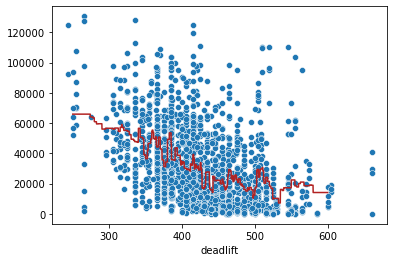

In [48]:
test_column = 'deadlift'
X_1 = X[[test_column]]

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

X_plot = pd.DataFrame(np.linspace(250,600,10000), columns=[test_column])

pipe = PipeKNN(36)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

X_plot_1 = X_plot.squeeze()

my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

{'kneighborsregressor__n_neighbors': 3}
Accuracy Score: 0.4322886395925747


<AxesSubplot:xlabel='filthy50'>

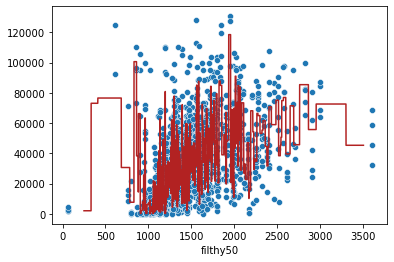

In [49]:
test_column = 'filthy50'
X_1 = X[[test_column]]

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

X_plot = pd.DataFrame(np.linspace(250,3500,5000), columns=[test_column])

pipe = PipeKNN(3)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

X_plot_1 = X_plot.squeeze()

my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

In [50]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 21316.230040084156
RMSE value for k=  2 is: 19524.48740440068
RMSE value for k=  3 is: 18665.660680186906
RMSE value for k=  4 is: 19041.432661733095
RMSE value for k=  5 is: 19262.26091490237
RMSE value for k=  6 is: 19549.004842395323
RMSE value for k=  7 is: 20022.948802244136
RMSE value for k=  8 is: 20098.42480235089
RMSE value for k=  9 is: 20081.52057648507
RMSE value for k=  10 is: 20216.788683739487
RMSE value for k=  11 is: 20377.46984936366
RMSE value for k=  12 is: 20265.486089275873
RMSE value for k=  13 is: 20234.42832552994
RMSE value for k=  14 is: 20157.668277591336
RMSE value for k=  15 is: 20116.264849427163
RMSE value for k=  16 is: 20169.617320970996
RMSE value for k=  17 is: 20299.402369402687
RMSE value for k=  18 is: 20317.6558130998
RMSE value for k=  19 is: 20335.69015153529
RMSE value for k=  20 is: 20298.428792285136


<AxesSubplot:>

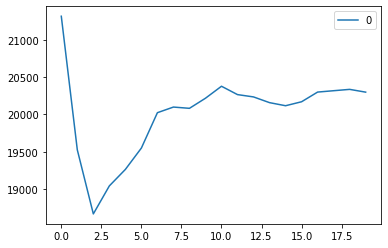

In [51]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

# The plot for the root mean squared error values
# has a corresponding elbow at 3 that does correspond 
# with what the cross validation grid search found as the 
# best parameters

In [52]:
list(df_with_dummies.columns)

['athlete_id',
 'name',
 'age',
 'height',
 'weight',
 'fran',
 'helen',
 'grace',
 'filthy50',
 'fgonebad',
 'run400',
 'run5k',
 'candj',
 'snatch',
 'deadlift',
 'backsq',
 'pullups',
 'retrieved_datetime_x',
 'year',
 'division',
 'stage',
 'rank',
 'score',
 'retrieved_datetime_y',
 'scaled',
 'I workout mostly at a CrossFit Affiliate',
 'I workout mostly at home, work, or a traditional gym',
 'I have a coach who determines my programming',
 'I incorporate CrossFit.com workouts',
 'I write my own programming',
 'I record my workouts',
 'Decline to answer',
 'I played youth or high school level sports',
 'I regularly play recreational sports',
 'I played college sports',
 'I played professional sports',
 'I have no athletic background besides CrossFit',
 'Decline to answer',
 'I began CrossFit by trying it alone (without a coach)',
 'I have completed the CrossFit Level 1 certificate course',
 'I train other people',
 'I have attended one or more specialty courses',
 'I have had a l

In [67]:
df1 = X.iloc[:, 100:9000]
#df1.head()
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = .3, random_state=801)
X_train.reset_index()

pipe = PipeKNN(3)
pipe.fit(X_train,y_train)
print('Accuracy Score:', pipe.score(X_test, y_test))


Accuracy Score: 0.4163003159831551


In [73]:
X.shape

(2461, 1169)